In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
w2 = np.zeros((N,N,N), dtype='float32')
S2 = np.zeros((N,N,N), dtype='float32')

In [4]:
start = time.time()

nproc = 8
nx = N//nproc

lw2 = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'
#folder = '/home/jhelsas/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

149.786693811


In [5]:
start = time.time()

nproc = 8
nx = N//nproc

lS2 = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'
#folder = '/home/jhelsas/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

119.640155077


In [6]:
del lw2,lS2

In [7]:
w2 = 0.5*w2

In [8]:
avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

(249.21841, 249.2186, 7.3471887e-07)


In [9]:
s2f = S2.flatten()
w2f = w2.flatten()

In [10]:
hist = np.zeros((N*N*N,2))

In [11]:
s2Min = np.min(s2f)
s2Max = np.max(s2f)
w2Min = np.min(w2f)
w2Max = np.max(w2f)
print("S2 min,max: ",s2Min/avg,s2Max/avg,"; w2 min,max: ",w2Min/avg,w2Max/avg)

('S2 min,max: ', 3.9848841e-05, 225.00957, '; w2 min,max: ', 1.4301999e-07, 675.16779)


In [12]:
hist[:,0] = np.log(s2f[:]/avg)/np.log(10)
hist[:,1] = np.log(w2f[:]/avg)/np.log(10)

In [13]:
ls2Min = np.min(hist[:,0])
ls2Max = np.max(hist[:,0])
lw2Min = np.min(hist[:,1])
lw2Max = np.max(hist[:,1])

In [14]:
print(ls2Min,ls2Max)
print(lw2Min,lw2Max)
print("log(S2) min,max: ",ls2Min,ls2Max,"; log(w2) min,max: ",lw2Min,lw2Max)

(-4.3995842933654785, 2.352200984954834)
(-6.8446030616760254, 2.8294117450714111)
('log(S2) min,max: ', -4.3995842933654785, 2.352200984954834, '; log(w2) min,max: ', -6.8446030616760254, 2.8294117450714111)


In [15]:
ls2binNum = 80
de = (ls2Max-ls2Min)/(ls2binNum)
lw2binNum = int((lw2Max-lw2Min)/(de))+1

print(ls2binNum,lw2binNum)

num  = max(ls2binNum,lw2binNum)
bmin = min(ls2Min,lw2Min)
bmax = max(ls2Max,lw2Max)

(80, 115)


In [16]:
H, edges = np.histogramdd(hist, bins=(num,num), range=((bmin,bmax),(bmin,bmax)), normed=True)

In [ ]:
filename = 'histogram-OE.npz'
np.savez(filename,H=H,edges=edges)

/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


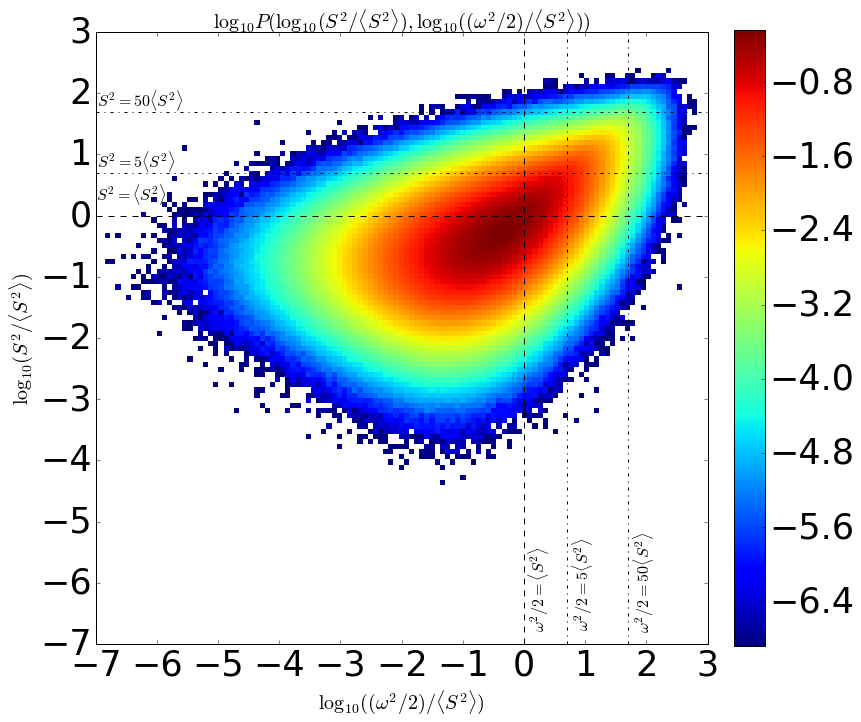

In [17]:
%matplotlib inline 

fig = plt.figure(figsize=(12,12))
logH = np.log(H)/np.log(10)

# matplotlib.rc('text', usetex=True)   
matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)    

plt.title(r'$\log_{10} P(\log_{10}{( S^2/\langle S^2\rangle)},\log_{10}{( (\omega^2/2)/\langle S^2\rangle)})$',size=20)
plt.ylabel(r'$\log_{10}{( S^2/\langle S^2\rangle)}$',size=20)
plt.xlabel(r'$\log_{10}{( (\omega^2/2)/\langle S^2\rangle)}$',size=20)

cax = plt.imshow(logH,interpolation='none',extent=(bmin,bmax,bmin,bmax),origin='lower', aspect='equal',cmap='jet')

ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
plt.xticks(ticks)
plt.yticks(ticks)

cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)
#########################################
#########################################
dw2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
ds2 = np.logspace(0, 0, num=250, endpoint=True, base=np.e)
plt.plot(np.log(dw2),np.log(ds2),'k--')
#########################################
dw2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
ds2 = np.logspace(np.log(5)/np.log(10), np.log(5)/np.log(10), num=250, endpoint=True, base=np.e)
plt.plot(np.log(dw2),np.log(ds2),'k-.')
#########################################
dw2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
ds2 = np.logspace(np.log(50)/np.log(10), np.log(50)/np.log(10), num=250, endpoint=True, base=np.e)
plt.plot(np.log(dw2),np.log(ds2),'k-.')
#########################################
#########################################
dw2 = np.logspace(0, 0, num=250, endpoint=True, base=np.e)
ds2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
plt.plot(np.log(dw2),np.log(ds2),'k--')
#########################################
dw2 = np.logspace(np.log(5)/np.log(10), np.log(5)/np.log(10), num=250, endpoint=True, base=np.e)
ds2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
plt.plot(np.log(dw2),np.log(ds2),'k-.')
#########################################
dw2 = np.logspace(np.log(50)/np.log(10), np.log(50)/np.log(10), num=250, endpoint=True, base=np.e)
ds2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
plt.plot(np.log(dw2),np.log(ds2),'k-.')
#########################################
########################################
plt.text(0.03, -5.7, r'$\omega^2/2= \langle S^2\rangle$', fontsize=16,rotation=90)
plt.text(0.75, -5.55, r'$\omega^2/2=5 \langle S^2\rangle$', fontsize=16,rotation=90)
plt.text(1.75, -5.45, r'$\omega^2/2=50 \langle S^2\rangle$', fontsize=16,rotation=90)
plt.text(-6.99, 0.25, r'$S^2=\langle S^2\rangle$', fontsize=16)
plt.text(-6.97, 0.79, r'$S^2=5\langle S^2\rangle$', fontsize=16)
plt.text(-6.97, 1.79, r'$S^2=50\langle S^2\rangle$', fontsize=16)
#########################################
plt.savefig('strain-enstr-jpdf-log.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [18]:
Nbins = 1024*8
wtemp = w2[:,:,:] 
w2red=np.zeros(Nbins,dtype='int')
lbins = np.logspace(np.log10(w2Min/avg),np.log10(w2Max/avg),Nbins)
histredw,edgesredw = np.histogram(wtemp/avg,lbins)

In [19]:
Nbins = 1024*8
stemp = S2[:,:,:] 
s2red=np.zeros(Nbins,dtype='int')
lbins = np.logspace(np.log10(s2Min/avg),np.log10(s2Max/avg),Nbins)
histreds,edgesreds = np.histogram(stemp/avg,lbins)

In [20]:
cache = True

if cache:
    np.savez("strainrate-enstrophy-jpdf.npz",H=H,edges=edges,
                                             histredw=histredw,
                                             edgesredw=edgesredw,
                                             histreds=histreds,
                                             edgesreds=edgesreds)

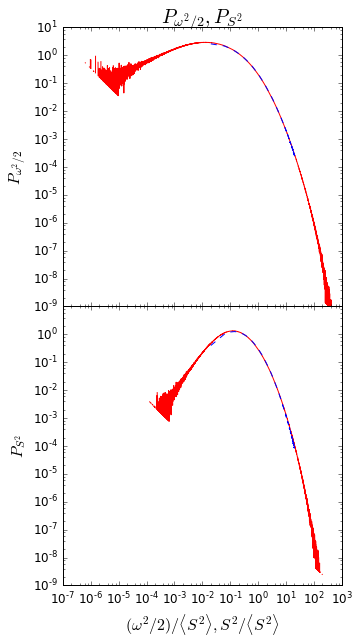

In [25]:
%matplotlib inline 

w2red[-1] = 0
s2red[-1] = 0
w2_bins = np.load('enstrophy_bins.npy')
w2_pdf = np.load('enstrophy_pdf.npy')
s2_bins = np.load('dissipation_bins.npy')
s2_pdf = np.load('dissipation_pdf.npy')
    
fig = plt.figure(figsize=(5,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)    

######################################

ax1 = plt.subplot(211)
ax2 = plt.subplot(212,sharex=ax1)

plt.subplots_adjust(hspace=.0)

######################################
    
SIZE = 12
plt.rcParams['figure.figsize'] = (5, 10)
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE+4)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE+3)  # legend fontsize
ax2.set_xlabel(r'$ (\omega^2/2)/{\langle S^2\rangle},S^2/{\langle S^2\rangle}$')
ax1.set_ylabel(r'$P_{\omega^2/2}$')
ax2.set_ylabel(r'$P_{S^2}$')
plt.setp(ax1.get_xticklabels(), visible=False)

######################################

leftw = edgesredw[0:(Nbins-1)]
rightw = edgesredw[1:Nbins]
normhistw = (histredw*(1024**(-3)))/(rightw-leftw)
normw = np.sum(normhistw*(rightw-leftw))

ax1.set_xlim((10**(-7),10**(3)))
ax1.set_ylim((10**(-9),10**(1)))
ax1.loglog((leftw+rightw)/2.,normhistw/normw,'r',label='Unfiltered')
ax1.loglog(w2_bins,w2_pdf,'b--')

yticks = [10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1)]
ax1.set_yticks(yticks)

######################################

lefts = edgesreds[0:(Nbins-1)]
rights = edgesreds[1:Nbins]
normhists = (histreds*(1024**(-3)))/(rights-lefts)
norms = np.sum(normhists*(rights-lefts))

ax2.set_xlim((10**(-7),10**(3)))
ax2.set_ylim((10**(-9),10**(1)))
ax2.loglog((lefts+rights)/2.,normhists/normw,'r',label='Unfiltered')
ax2.loglog(s2_bins,s2_pdf,'b--')

yticks = [10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0)]
ax2.set_yticks(yticks)

######################################

ax1.title.set_text(r'$P_{\omega^2/2},P_{S^2}$')
ax1.title.set_size(20)

plt.subplots_adjust(wspace = 0.1)
plt.savefig('strain-enstr-pdfs.pdf', format='pdf', bbox_inches='tight', transparent=True)